# Logistic Regression Project Tutorial

In [2]:
#Importamos librerias

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
from sklearn.impute import KNNImputer
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import xgboost as xgb
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from lazypredict.Supervised import LazyRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *
from sklearn.ensemble import BaggingRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
import joblib

df = pd.read_csv("/workspaces/Machine_learning_Vicente/data/raw/bank-marketing-campaign-data.csv", sep= ';' )

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no


Comprobamos el tamaño del Dataframe

In [3]:
df.shape

(41188, 21)

Análisis de constantes

In [4]:
n_unicos = df.nunique()
n_unicos

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

Revisamos que no hay duplicados. Los valores que se repiten no 

In [6]:
duplicadas = df[df.duplicated(keep=False)]

duplicadas



,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1265,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.10,93.99,-36.40,4.86,5191.00,no
12260,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.40,93.92,-42.70,4.97,5228.10,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.40,93.92,-42.70,4.97,5228.10,no
14155,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.40,93.92,-42.70,4.96,5228.10,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.40,93.92,-42.70,4.96,5228.10,no
16819,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.40,93.92,-42.70,4.96,5228.10,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.40,93.92,-42.70,4.96,5228.10,no
18464,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.40,93.92,-42.70,4.97,5228.10,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.40,93.92,-42.70,4.97,5228.10,no


Contamos los valores duplicados

In [7]:
df.duplicated().sum()

np.int64(12)

Eliminamos valores duplicados

In [8]:

df.drop(df[df.duplicated()].index, inplace=True)


Comprobamos que ya no hay duplicados

In [9]:
df.duplicated().sum()

np.int64(0)

Comprobamos si hay valores faltantes con matriz

<Axes: >

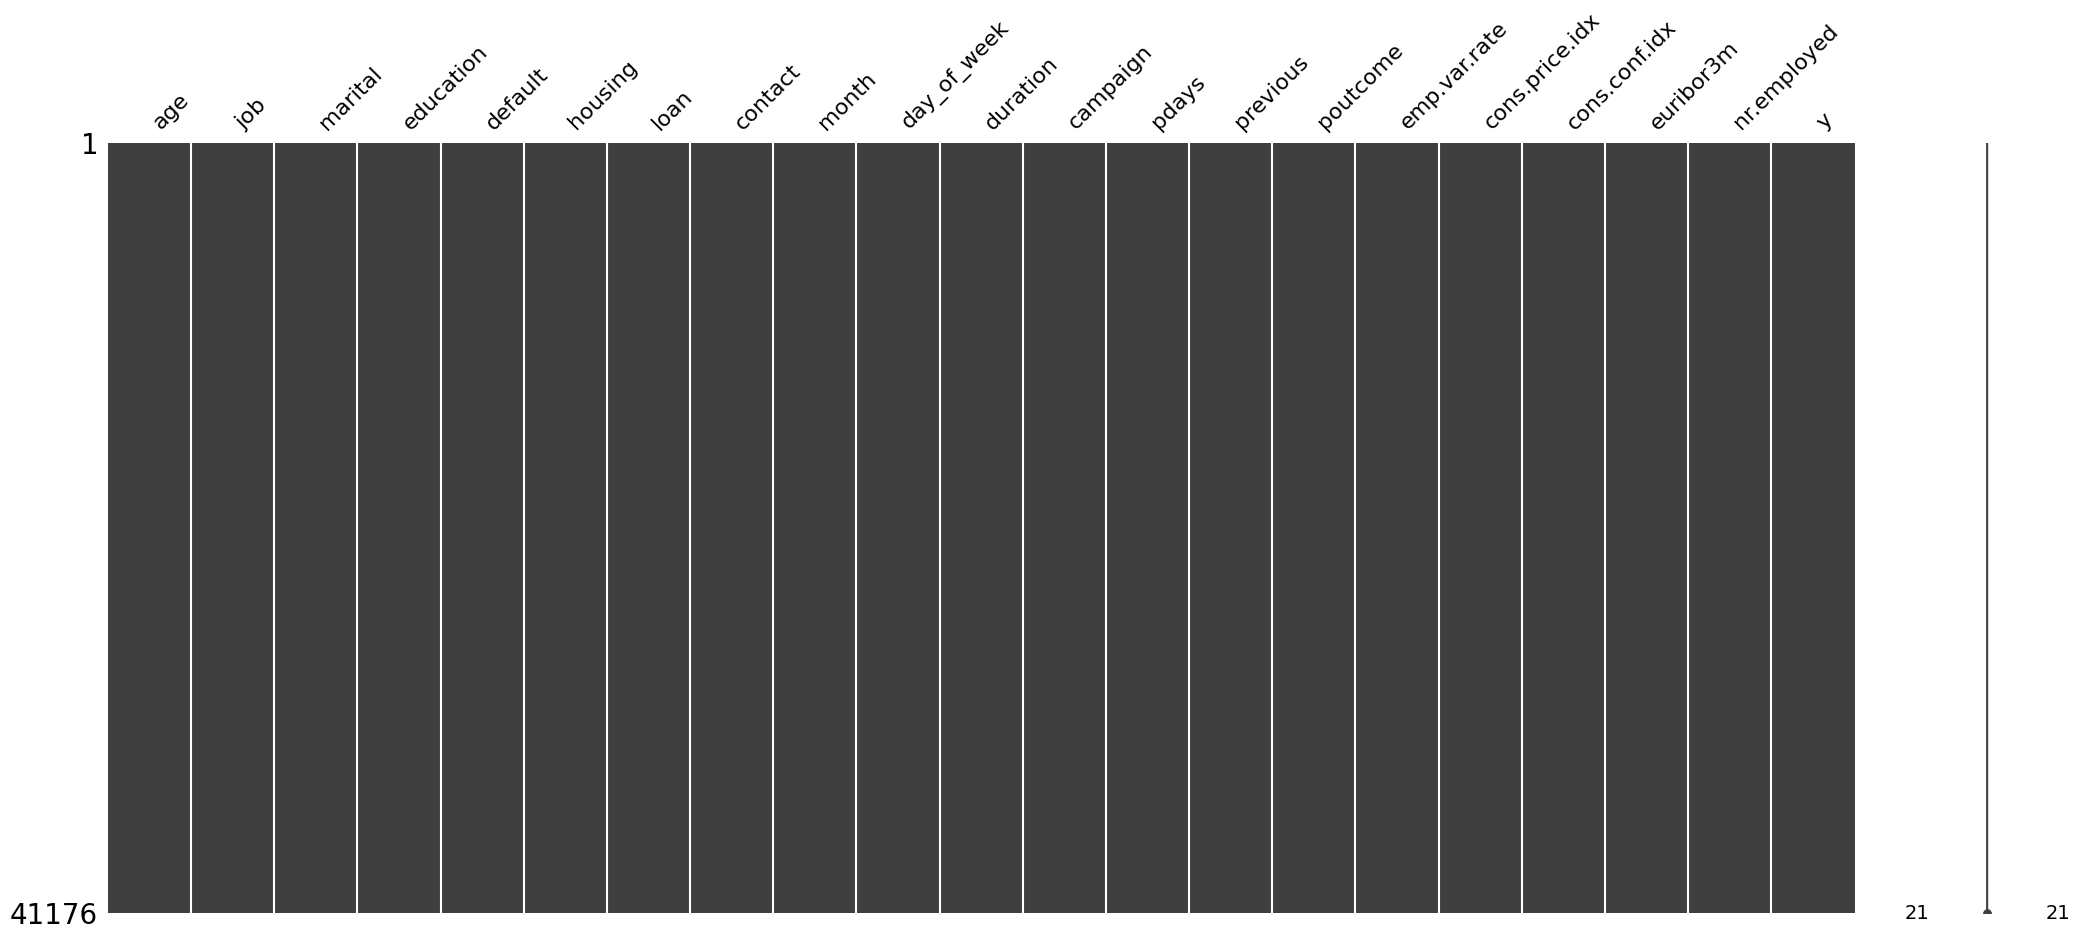

In [9]:
msno.matrix(df)

Comprobamos el porcentaje de valores faltantes

In [ ]:
df.isnull().mean()*100

age              0.00
job              0.00
marital          0.00
education        0.00
default          0.00
housing          0.00
loan             0.00
contact          0.00
month            0.00
day_of_week      0.00
duration         0.00
campaign         0.00
pdays            0.00
previous         0.00
poutcome         0.00
emp.var.rate     0.00
cons.price.idx   0.00
cons.conf.idx    0.00
euribor3m        0.00
nr.employed      0.00
y                0.00
dtype: float64

Vemos el tipo de columnas para la asignación como tal a categóricas/no categóricas

In [11]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

# Identificamos observaciones influyentes

In [12]:
# Separamos las variables independientes de la dependiente

#Necesitamos factorizar para convertir en numérico las variables categóricas

df["job"] = pd.factorize(df["job"])[0]
df["marital"] = pd.factorize(df["marital"])[0]
df["education"] = pd.factorize(df["education"])[0]
df["default"] = pd.factorize(df["default"])[0]
df["housing"] = pd.factorize(df["housing"])[0]
df["loan"] = pd.factorize(df["loan"])[0]
df["contact"] = pd.factorize(df["contact"])[0]
df["month"] = pd.factorize(df["month"])[0]
df["day_of_week"] = pd.factorize(df["day_of_week"])[0]
df["poutcome"] = pd.factorize(df["poutcome"])[0]

#Convertimos a numérico la variable independiente
df["y"] = pd.factorize(df["y"])[0]

X = df.drop(['y'], axis=1)
y = df['y']


#Comprobamos que la conversión se ha llevado a cabo

In [13]:
df.dtypes

age                 int64
job                 int64
marital             int64
education           int64
default             int64
housing             int64
loan                int64
contact             int64
month               int64
day_of_week         int64
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome            int64
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                   int64
dtype: object

# Ajustar un modelo de regresión lineal

In [14]:

X = sm.add_constant(X)  
model = sm.OLS(y, X).fit()

# Instancia de la influencia y obtención de la distancia de Cook para cada observación
cooks_distance = model.get_influence().cooks_distance



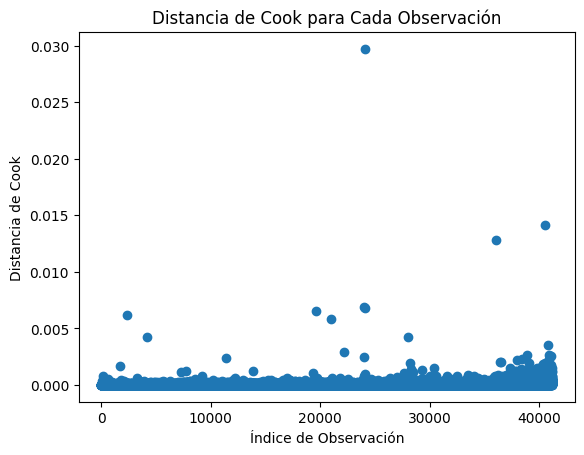

In [15]:

plt.scatter(range(len(cooks_distance[0])), cooks_distance[0])
plt.xlabel('Índice de Observación')
plt.ylabel('Distancia de Cook')
plt.title('Distancia de Cook para Cada Observación')

plt.show()


In [16]:
pto_corte = 4/len(df)

len(np.where(cooks_distance[0]>pto_corte)[0])

np.where(cooks_distance[0]>0.05)

(array([], dtype=int64),)

Si tuvieramos valores que excediesen el límite que hemos marcado utilizaríamos: 

In [18]:
#df1 = df.drop(np.where(cooks_distance[0]>pto_corte)[0])

# Dividimos el data set entre train y test

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Selección de características.

In [18]:
X_train.corr()

,const,age,job,marital,education,default,housing,loan,contact,month,...,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
const,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,NaN,1.00,0.04,-0.11,-0.09,0.16,-0.00,-0.00,-0.01,0.09,...,0.00,0.00,-0.04,0.02,0.03,-0.00,0.00,0.12,0.01,-0.02
job,NaN,0.04,1.00,-0.01,0.17,-0.02,0.01,-0.01,0.02,0.08,...,0.01,-0.01,-0.05,0.05,0.05,-0.08,-0.04,0.02,-0.07,-0.08
marital,NaN,-0.11,-0.01,1.00,0.06,-0.11,0.01,-0.00,0.04,0.02,...,0.00,0.00,-0.02,0.03,0.03,-0.05,-0.03,-0.05,-0.05,-0.05
education,NaN,-0.09,0.17,0.06,1.00,-0.14,0.02,-0.00,0.09,0.11,...,-0.02,-0.00,-0.03,0.02,0.03,-0.03,-0.08,0.08,-0.02,-0.03
default,NaN,0.16,-0.02,-0.11,-0.14,1.00,-0.01,0.00,-0.13,-0.13,...,-0.01,0.03,0.08,-0.10,-0.11,0.20,0.17,0.02,0.19,0.19
housing,NaN,-0.00,0.01,0.01,0.02,-0.01,1.00,0.29,0.07,0.04,...,-0.01,-0.01,-0.01,0.02,0.02,-0.05,-0.07,-0.03,-0.05,-0.04
loan,NaN,-0.00,-0.01,-0.00,-0.00,0.00,0.29,1.00,-0.01,-0.01,...,-0.00,0.01,-0.00,0.00,0.00,0.01,0.01,-0.01,0.00,0.01
contact,NaN,-0.01,0.02,0.04,0.09,-0.13,0.07,-0.01,1.00,0.43,...,0.02,-0.08,-0.12,0.21,0.23,-0.39,-0.59,-0.25,-0.40,-0.27
month,NaN,0.09,0.08,0.02,0.11,-0.13,0.04,-0.01,0.43,1.00,...,0.02,-0.08,-0.14,0.18,0.19,-0.30,-0.33,-0.06,-0.28,-0.26


Este método aplica directamente la función variance_inflation_factor al conjunto de datos original X_train (matriz de características).
Considera no solo las correlaciones entre las variables, sino también su relación directa con la respuesta en el modelo.
Es el enfoque adecuado porque el cálculo del VIF requiere evaluar la varianza explicada de cada variable X(sub i) 
en función de las otras variables, lo cual necesita los valores reales de las variables y no solo las correlaciones.


Si usamos X_train.corr: 

La matriz de correlación no contiene información sobre las escalas de las variables ni sus valores originales. Como resultado, este enfoque puede producir resultados incorrectos o indefinidos.

Error común: En muchos casos, usar la matriz de correlación da lugar al error MissingDataError si hay NaN o problemas con la matriz invertible.

In [20]:
vif = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns
)

vif


const            640570.78
age                   1.08
job                   1.05
marital               1.03
education             1.09
default               1.11
housing               1.10
loan                  1.09
contact               2.29
month                 1.38
day_of_week           1.00
duration              1.01
campaign              1.04
pdays                 2.58
previous              4.47
poutcome              6.69
emp.var.rate         39.44
cons.price.idx        9.15
cons.conf.idx         2.91
euribor3m            68.94
nr.employed          33.45
dtype: float64

<Axes: >

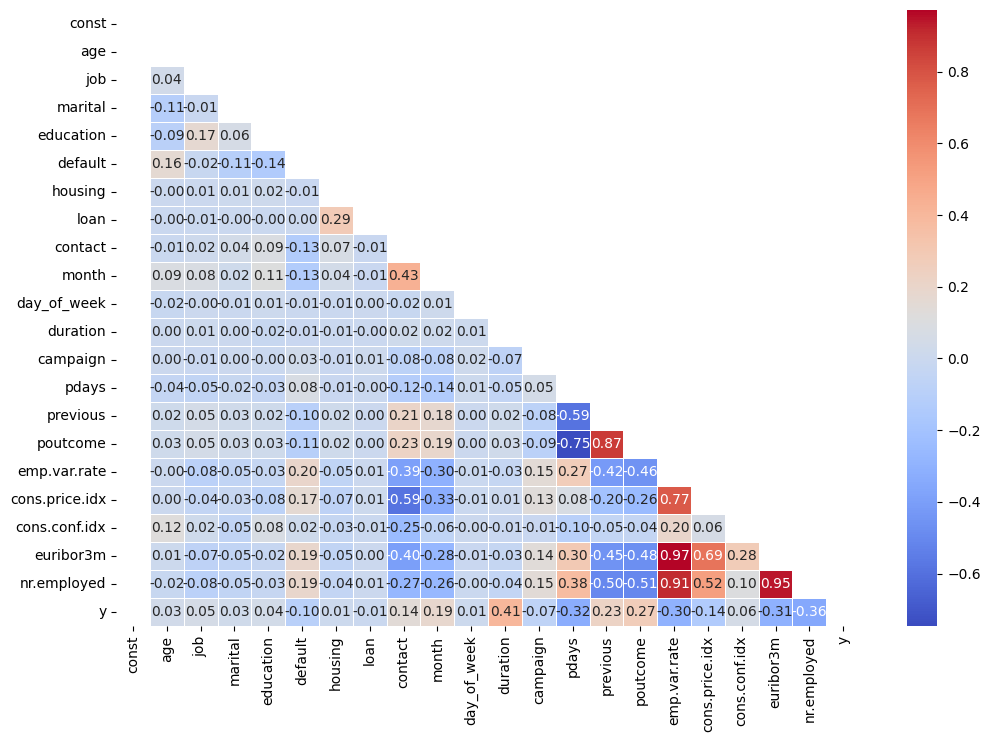

In [21]:
X_corr = X_train.copy()
X_corr['y'] = y_train
corr = X_corr.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(12, 8))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')

Identificar las variables binarias

In [22]:
binary_cols = X_train[(X_train == 0)|(X_train == 1)].dropna(axis=1).columns
binary_cols

Index(['const', 'contact'], dtype='object')

In [23]:
# selecciono las columnas que no son binarias
X_train_num = X_train.drop(binary_cols, axis=1)
X_test_num = X_test.drop(binary_cols, axis=1)

Instancio la clase del escalador y lo ajusto con los datos de entrenamiento

In [24]:
scaler = MinMaxScaler().fit(X_train_num)

Transformamos los datos numericos con el escalador ajustado

In [25]:
X_train_num_sc = scaler.transform(X_train_num)
X_test_num_sc = scaler.transform(X_test_num)

In [26]:
X_train_sc = pd.concat([pd.DataFrame(X_train_num_sc, columns = X_train_num.columns), X_train[binary_cols].reset_index(drop=True)], axis=1)
X_test_sc = pd.concat([pd.DataFrame(X_test_num_sc, columns = X_test_num.columns), X_test[binary_cols].reset_index(drop=True)], axis=1)

from sklearn.feature_selection import SelectKBest, f_regression
selector = SelectKBest(score_func=f_regression, k=20)  # Selecciona las 20 mejores características
X_train_sc_reduced = selector.fit_transform(X_train_sc, y_train)
X_test_sc_reduced = selector.transform(X_test_sc)

In [27]:
X_train_sc

,age,job,marital,education,default,housing,loan,month,day_of_week,duration,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,const,contact
0,0.15,0.91,0.00,0.29,0.00,0.50,0.50,0.22,1.00,0.06,...,1.00,0.00,0.00,1.00,0.67,0.34,0.98,1.00,1.00,0
1,0.41,0.18,0.33,0.86,0.00,0.00,0.00,0.11,0.50,0.04,...,1.00,0.00,0.00,1.00,0.88,0.38,0.96,1.00,1.00,0
2,0.15,0.18,0.33,0.86,0.00,0.00,0.00,0.33,0.25,0.02,...,1.00,0.00,0.00,1.00,0.48,0.62,0.98,1.00,1.00,1
3,0.22,0.18,0.33,0.86,0.00,0.00,0.00,0.00,0.75,0.03,...,1.00,0.00,0.00,0.94,0.70,0.60,0.96,0.86,1.00,0
4,0.28,0.27,0.33,0.14,0.50,0.00,0.00,0.00,0.25,0.08,...,1.00,0.00,0.00,0.33,0.27,0.19,0.15,0.51,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32935,0.21,0.27,0.00,0.43,0.00,0.00,0.50,0.00,0.25,0.02,...,1.00,0.00,0.00,0.94,0.70,0.60,0.96,0.86,1.00,0
32936,0.15,0.18,0.00,0.43,0.00,0.50,0.00,0.11,0.75,0.02,...,1.00,0.00,0.00,1.00,0.88,0.38,0.98,1.00,1.00,0
32937,0.67,0.45,0.00,0.00,0.00,0.00,0.00,0.44,0.75,0.05,...,1.00,0.29,0.50,0.00,0.09,1.00,0.03,0.20,1.00,1
32938,0.28,0.55,0.00,0.86,0.00,0.50,0.00,0.00,0.50,0.06,...,1.00,0.00,0.00,0.94,0.70,0.60,0.96,0.86,1.00,0


# Selección del algoritmo regresivo

In [30]:
reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = reg.fit(X_train_sc, X_test_sc, y_train, y_test)



 62%|██████▏   | 26/42 [00:21<00:17,  1.09s/it]